### Задача 1: сравнение предложений

Загружаем и читаем данные.

In [3]:
with open(r'C:\Users\Yello\Downloads\MIPT\_3a8d746cf4d86fba2f31586f239d11fd_sentences.txt') as f:
    data = f.readlines()
# you may also want to remove whitespace characters like `\n` at the end of each line
data = [x.strip() for x in data] 
data

['In comparison to dogs, cats have not undergone major changes during the domestication process.',
 'As cat simply catenates streams of bytes, it can be also used to concatenate binary files, where it will just concatenate sequence of bytes.',
 'A common interactive use of cat for a single file is to output the content of a file to standard output.',
 'Cats can hear sounds too faint or too high in frequency for human ears, such as those made by mice and other small animals.',
 'In one, people deliberately tamed cats in a process of artificial selection, as they were useful predators of vermin.',
 'The domesticated cat and its closest wild ancestor are both diploid organisms that possess 38 chromosomes and roughly 20,000 genes.',
 'Domestic cats are similar in size to the other members of the genus Felis, typically weighing between 4 and 5 kg (8.8 and 11.0 lb).',
 'However, if the output is piped or redirected, cat is unnecessary.',
 'cat with one named file is safer where human error i

Приводим предложения к нижнему регистру.

In [4]:
data2 = [i.lower() for i in data]

Производим токенизацию и убираем пустые слова после разделения.

In [5]:
import re

In [6]:
data3 = [list(filter(None,re.split('[^a-z]', i))) for i in data2]
data3

[['in',
  'comparison',
  'to',
  'dogs',
  'cats',
  'have',
  'not',
  'undergone',
  'major',
  'changes',
  'during',
  'the',
  'domestication',
  'process'],
 ['as',
  'cat',
  'simply',
  'catenates',
  'streams',
  'of',
  'bytes',
  'it',
  'can',
  'be',
  'also',
  'used',
  'to',
  'concatenate',
  'binary',
  'files',
  'where',
  'it',
  'will',
  'just',
  'concatenate',
  'sequence',
  'of',
  'bytes'],
 ['a',
  'common',
  'interactive',
  'use',
  'of',
  'cat',
  'for',
  'a',
  'single',
  'file',
  'is',
  'to',
  'output',
  'the',
  'content',
  'of',
  'a',
  'file',
  'to',
  'standard',
  'output'],
 ['cats',
  'can',
  'hear',
  'sounds',
  'too',
  'faint',
  'or',
  'too',
  'high',
  'in',
  'frequency',
  'for',
  'human',
  'ears',
  'such',
  'as',
  'those',
  'made',
  'by',
  'mice',
  'and',
  'other',
  'small',
  'animals'],
 ['in',
  'one',
  'people',
  'deliberately',
  'tamed',
  'cats',
  'in',
  'a',
  'process',
  'of',
  'artificial',
  's

Составляем словарь всех слов, что встречаются в предложениях.

In [10]:
d=[]
for i in data3:
    d.extend(i) 

In [12]:
import numpy as np
uniques = np.unique(d)

In [15]:
dictionary = dict(zip(uniques, np.arange(len(d))))

In [16]:
dictionary

{'a': 0,
 'according': 1,
 'adjacent': 2,
 'allow': 3,
 'allows': 4,
 'also': 5,
 'an': 6,
 'ancestor': 7,
 'and': 8,
 'animals': 9,
 'any': 10,
 'app': 11,
 'apple': 12,
 'are': 13,
 'arguments': 14,
 'artificial': 15,
 'as': 16,
 'available': 17,
 'based': 18,
 'basic': 19,
 'be': 20,
 'between': 21,
 'binary': 22,
 'both': 23,
 'by': 24,
 'bytes': 25,
 'can': 26,
 'cat': 27,
 'catenates': 28,
 'cats': 29,
 'changes': 30,
 'chromosomes': 31,
 'clear': 32,
 'closest': 33,
 'command': 34,
 'commands': 35,
 'common': 36,
 'community': 37,
 'comparison': 38,
 'computers': 39,
 'concatenate': 40,
 'concern': 41,
 'connected': 42,
 'contains': 43,
 'content': 44,
 'count': 45,
 'create': 46,
 'default': 47,
 'delete': 48,
 'deliberately': 49,
 'developed': 50,
 'diploid': 51,
 'disk': 52,
 'displays': 53,
 'dogs': 54,
 'domestic': 55,
 'domesticated': 56,
 'domestication': 57,
 'download': 58,
 'drive': 59,
 'during': 60,
 'ears': 61,
 'editions': 62,
 'enhancements': 63,
 'entirely': 64,


Создаем матрицу размера n * d, где n — число предложений, d - число различных слов.

In [17]:
M = np.zeros((len(data3), len(uniques)))
M.shape

(22, 254)

Заполняем матрицу. Элемент матрицы с индексом (i,j) равен количеству вхождений j-го слова в i-е предложение.

In [18]:
for i in np.arange(len(data3)):
    for j in np.arange(len(uniques)):
        M[i,j] = data3[i].count(uniques[j])
M

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [3., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.]])

Находим косинусное расстояние от первого предложения до всех остальных.

In [124]:
from scipy.spatial.distance import cosine

cos = [cosine(M[0], i) for i in M] 
cos

[0.0,
 0.95275444087384664,
 0.86447381456421235,
 0.89517151632780823,
 0.77708871496985887,
 0.94023856953328033,
 0.7327387580875756,
 0.92587506833388988,
 0.88427248752843102,
 0.90550888174769317,
 0.83281653622739416,
 0.88047713906656067,
 0.83964325485254543,
 0.87035925528956715,
 0.87401184233025764,
 0.94427217874246472,
 0.84063618542208085,
 0.95664450152379399,
 0.94427217874246472,
 0.88854435748492944,
 0.84275727449171223,
 0.82503644694405864]

Находим индекс минимального расстояния, исключая 0.

In [125]:
cos.index(min(cos[1:]))

6

Индекс второго минимального расстояния:

In [126]:
cos[6] = 1
cos.index(min(cos[1:]))

4

Выводим полученные предложения на экран:

In [119]:
data[6]

'Domestic cats are similar in size to the other members of the genus Felis, typically weighing between 4 and 5 kg (8.8 and 11.0 lb).'

In [121]:
data[4]

'In one, people deliberately tamed cats in a process of artificial selection, as they were useful predators of vermin.'

Сравним их с первым предложением.

In [27]:
data[0]

'In comparison to dogs, cats have not undergone major changes during the domestication process.'

Темы предложений совпадают.

In [122]:
with open('linalg1.txt',"w") as fout:
        fout.write(" ".join([str(el) for el in [6, 4]]))

### Задача 2: аппроксимация функции

f(x) = sin(x / 5) * exp(x / 10) + 5 * exp(-x / 2)

In [2]:
import numpy as np

In [30]:
x = np.arange(1, 15.1, 0.1)
x

array([  1. ,   1.1,   1.2,   1.3,   1.4,   1.5,   1.6,   1.7,   1.8,
         1.9,   2. ,   2.1,   2.2,   2.3,   2.4,   2.5,   2.6,   2.7,
         2.8,   2.9,   3. ,   3.1,   3.2,   3.3,   3.4,   3.5,   3.6,
         3.7,   3.8,   3.9,   4. ,   4.1,   4.2,   4.3,   4.4,   4.5,
         4.6,   4.7,   4.8,   4.9,   5. ,   5.1,   5.2,   5.3,   5.4,
         5.5,   5.6,   5.7,   5.8,   5.9,   6. ,   6.1,   6.2,   6.3,
         6.4,   6.5,   6.6,   6.7,   6.8,   6.9,   7. ,   7.1,   7.2,
         7.3,   7.4,   7.5,   7.6,   7.7,   7.8,   7.9,   8. ,   8.1,
         8.2,   8.3,   8.4,   8.5,   8.6,   8.7,   8.8,   8.9,   9. ,
         9.1,   9.2,   9.3,   9.4,   9.5,   9.6,   9.7,   9.8,   9.9,
        10. ,  10.1,  10.2,  10.3,  10.4,  10.5,  10.6,  10.7,  10.8,
        10.9,  11. ,  11.1,  11.2,  11.3,  11.4,  11.5,  11.6,  11.7,
        11.8,  11.9,  12. ,  12.1,  12.2,  12.3,  12.4,  12.5,  12.6,
        12.7,  12.8,  12.9,  13. ,  13.1,  13.2,  13.3,  13.4,  13.5,
        13.6,  13.7,

In [31]:
def f(x):
    return np.sin(x / 5.)*np.exp(x / 10.) + 5*np.exp(-x / 2.)

In [32]:
f(x)

array([ 3.25221687,  3.12835399,  3.01206714,  2.90299951,  2.80081118,
        2.70517826,  2.6157921 ,  2.53235853,  2.45459713,  2.38224055,
        2.31503384,  2.25273387,  2.19510867,  2.14193694,  2.09300744,
        2.04811856,  2.00707777,  1.96970118,  1.93581311,  1.90524569,
        1.87783842,  1.8534378 ,  1.83189701,  1.81307554,  1.79683886,
        1.78305813,  1.77160989,  1.76237578,  1.75524231,  1.75010055,
        1.74684595,  1.74537806,  1.74560034,  1.74741997,  1.75074761,
        1.75549726,  1.76158605,  1.76893408,  1.77746429,  1.78710226,
        1.7977761 ,  1.80941632,  1.82195565,  1.83532898,  1.84947321,
        1.86432715,  1.8798314 ,  1.89592828,  1.91256169,  1.92967706,
        1.94722128,  1.96514256,  1.98339041,  2.00191553,  2.02066978,
        2.03960608,  2.05867839,  2.07784159,  2.09705151,  2.11626482,
        2.13543898,  2.15453224,  2.17350357,  2.19231261,  2.21091966,
        2.22928563,  2.24737201,  2.26514084,  2.28255469,  2.29

Решение для многочлена первой степени.

In [33]:
A = np.matrix([[1, 1],[1,15]])
A

matrix([[ 1,  1],
        [ 1, 15]])

In [34]:
b = [f(1),f(15)]
b

[3.2522168652714192, 0.63522141957866562]

In [35]:
from scipy.linalg import solve

W1 = solve(A, b)
W1

array([ 3.43914511, -0.18692825])

In [36]:
def mn1(x):
    return W1[0] +W1[1]*x

In [37]:
mn1(x)

array([ 3.25221687,  3.23352404,  3.21483122,  3.19613839,  3.17744557,
        3.15875274,  3.14005992,  3.12136709,  3.10267427,  3.08398144,
        3.06528862,  3.04659579,  3.02790297,  3.00921015,  2.99051732,
        2.9718245 ,  2.95313167,  2.93443885,  2.91574602,  2.8970532 ,
        2.87836037,  2.85966755,  2.84097472,  2.8222819 ,  2.80358907,
        2.78489625,  2.76620343,  2.7475106 ,  2.72881778,  2.71012495,
        2.69143213,  2.6727393 ,  2.65404648,  2.63535365,  2.61666083,
        2.597968  ,  2.57927518,  2.56058235,  2.54188953,  2.52319671,
        2.50450388,  2.48581106,  2.46711823,  2.44842541,  2.42973258,
        2.41103976,  2.39234693,  2.37365411,  2.35496128,  2.33626846,
        2.31757563,  2.29888281,  2.28018999,  2.26149716,  2.24280434,
        2.22411151,  2.20541869,  2.18672586,  2.16803304,  2.14934021,
        2.13064739,  2.11195456,  2.09326174,  2.07456891,  2.05587609,
        2.03718327,  2.01849044,  1.99979762,  1.98110479,  1.96

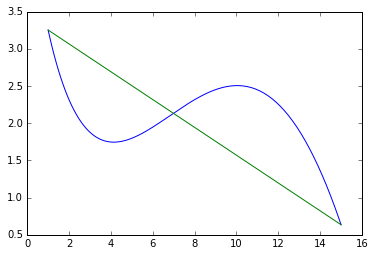

In [38]:
%matplotlib inline
from matplotlib import pylab as plt

plt.plot(x, f(x))
plt.plot(x, mn1(x))

Решение для многочлена второй степени.

In [43]:
A = np.matrix([[1, 1, 1],[1, 8, 64],[1, 15, 225]])
b = [f(1), f(8), f(15)]
W2 = solve(A, b)

In [49]:
def mn2(x):
    return W2[0] + W2[1]*x + W2[2]*x**2

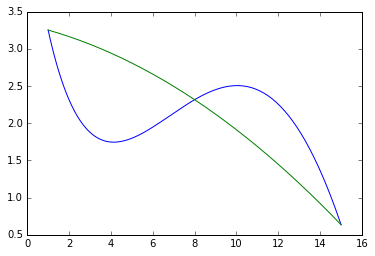

In [50]:
plt.plot(x, f(x))
plt.plot(x, mn2(x))

Решение для многочлена третей степени.

In [51]:
A = np.matrix([[1, 1, 1, 1],[1, 4, 16, 4**3],[1, 10, 100, 1000], [1, 15, 225, 15**3]])
b = [f(1), f(4), f(10), f(15)]
W3 = solve(A, b)

In [52]:
def mn3(x):
    return W3[0] + W3[1]*x + W3[2]*x**2 + W3[3]*x**3

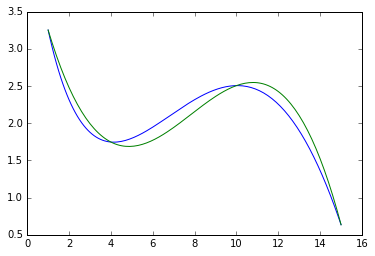

In [54]:
plt.plot(x, f(x))
plt.plot(x, mn3(x))

In [58]:
with open('linalg2.txt',"w") as fout:
        fout.write(" ".join([str(np.round(el, 2)) for el in W3]))